In [1]:
import pandas as pd
import numpy as np
from music21 import converter, chord, note, instrument, stream
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import set_matplotlib_formats
import librosa
from librosa.display import specshow
from collections import defaultdict
from task1_scene_classification import *

plt.style.use('ggplot')
%pylab inline
set_matplotlib_formats('retina')

pd.set_option('display.max_columns', 999)


Populating the interactive namespace from numpy and matplotlib


/Users/Haebichan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Haebichan/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
midi = converter.parse('/Users/Haebichan/Desktop/Final Project Galvanize/C Major Midi/Falling Slowly.mid')


for i in midi.parts:
            i.insert(0, instrument.Piano())

In [3]:
parts = instrument.partitionByInstrument(midi)

notes = []
notes_offset = []
durations = []

for i in parts.recurse():
    if isinstance(i, note.Note):
        notes.append(str(i.pitch))
        notes_offset.append(float(i.offset))
        durations.append(float(i.duration.quarterLength))

    elif isinstance(i, chord.Chord):
        notes_offset.append(float(i.offset))
        durations.append(float(i.duration.quarterLength))
        
        i = str(i).replace('>', '')
        chords = '|'.join(i.split()[1:])
        notes.append(chords)
        

                

In [4]:
melody = []
melody_offset = []
melody_durations = []

for i in midi[0].recurse():
    if isinstance(i, note.Note):
        melody.append(str(i.pitch))
        melody_offset.append(float(i.offset))
        melody_durations.append(float(i.duration.quarterLength))

    elif isinstance(i, chord.Chord):
        melody_offset.append(float(i.offset))
        melody_durations.append(float(i.duration.quarterLength))
        
        i = str(i).replace('>', '')
        chords = '|'.join(i.split()[1:])
        melody.append(chords)
        
                

In [5]:
harmony = []
harmony_offset = []
harmony_durations = []

for i in midi[1].recurse():
    if isinstance(i, note.Note):
        harmony.append(str(i.pitch))
        harmony_offset.append(float(i.offset))
        harmony_durations.append(float(i.duration.quarterLength))

    elif isinstance(i, chord.Chord):
        harmony_offset.append(float(i.offset))
        harmony_durations.append(float(i.duration.quarterLength))
        
        i = str(i).replace('>', '')
        chords = '|'.join(i.split()[1:])
        harmony.append(chords)
        
                

In [6]:
# there are extra 4 C harmony notes for some reason. I'm not sure why since they don't appear in the mid file

harmony = harmony[:-4]

In [7]:
# df = pd.DataFrame(notes).rename(columns = {0:'notes'}).join(pd.DataFrame(durations)).rename(columns = {0: 'durations'}).join(pd.DataFrame(notes_offset)).rename(columns = {0: 'offset'})

In [8]:
all_notes = sorted(set(notes))

In [9]:
all_notes

['A2|E3',
 'A4',
 'B4',
 'C3',
 'C3|G3',
 'C5',
 'D5',
 'E5',
 'F2',
 'F2|C3',
 'F5',
 'G2|D3',
 'G3',
 'G4',
 'G5']

In [10]:
dic = {}

for i,j in enumerate(all_notes):
    dic[j] = i

In [11]:
data = defaultdict(list)

for i in range(len(harmony)):
    count = 0
    
    while count < 2:  
        data[i].append(harmony[i])
        count += harmony_durations[i]


left_idx, duration_sum = 0, 0
for i in range(len(melody)):
    data[left_idx].append(melody[i])
    duration_sum += melody_durations[i]
    if duration_sum >= 2:
        duration_sum = 0
        left_idx += 1    
    


In [12]:
max(dic.values())

14

In [13]:
new_dic = defaultdict(list)

for i,j in data.items():
    for k in j:
        new_dic[i].append(dic[k])

In [14]:
dic_list= []
for i,j in new_dic.items():
    dic_list.append(j)

In [15]:
all_notes

['A2|E3',
 'A4',
 'B4',
 'C3',
 'C3|G3',
 'C5',
 'D5',
 'E5',
 'F2',
 'F2|C3',
 'F5',
 'G2|D3',
 'G3',
 'G4',
 'G5']

In [16]:
# Extra 6 C Harmony Notes
dic_list = dic_list[:-6]

In [17]:
from scipy.spatial.distance import pdist,squareform

In [18]:
df = pd.DataFrame(dic_list).fillna(max(dic.values())+1)

In [19]:
self_similarity_matrix = squareform(pdist(df, metric='cosine'))

In [20]:
len(dic_list)

103

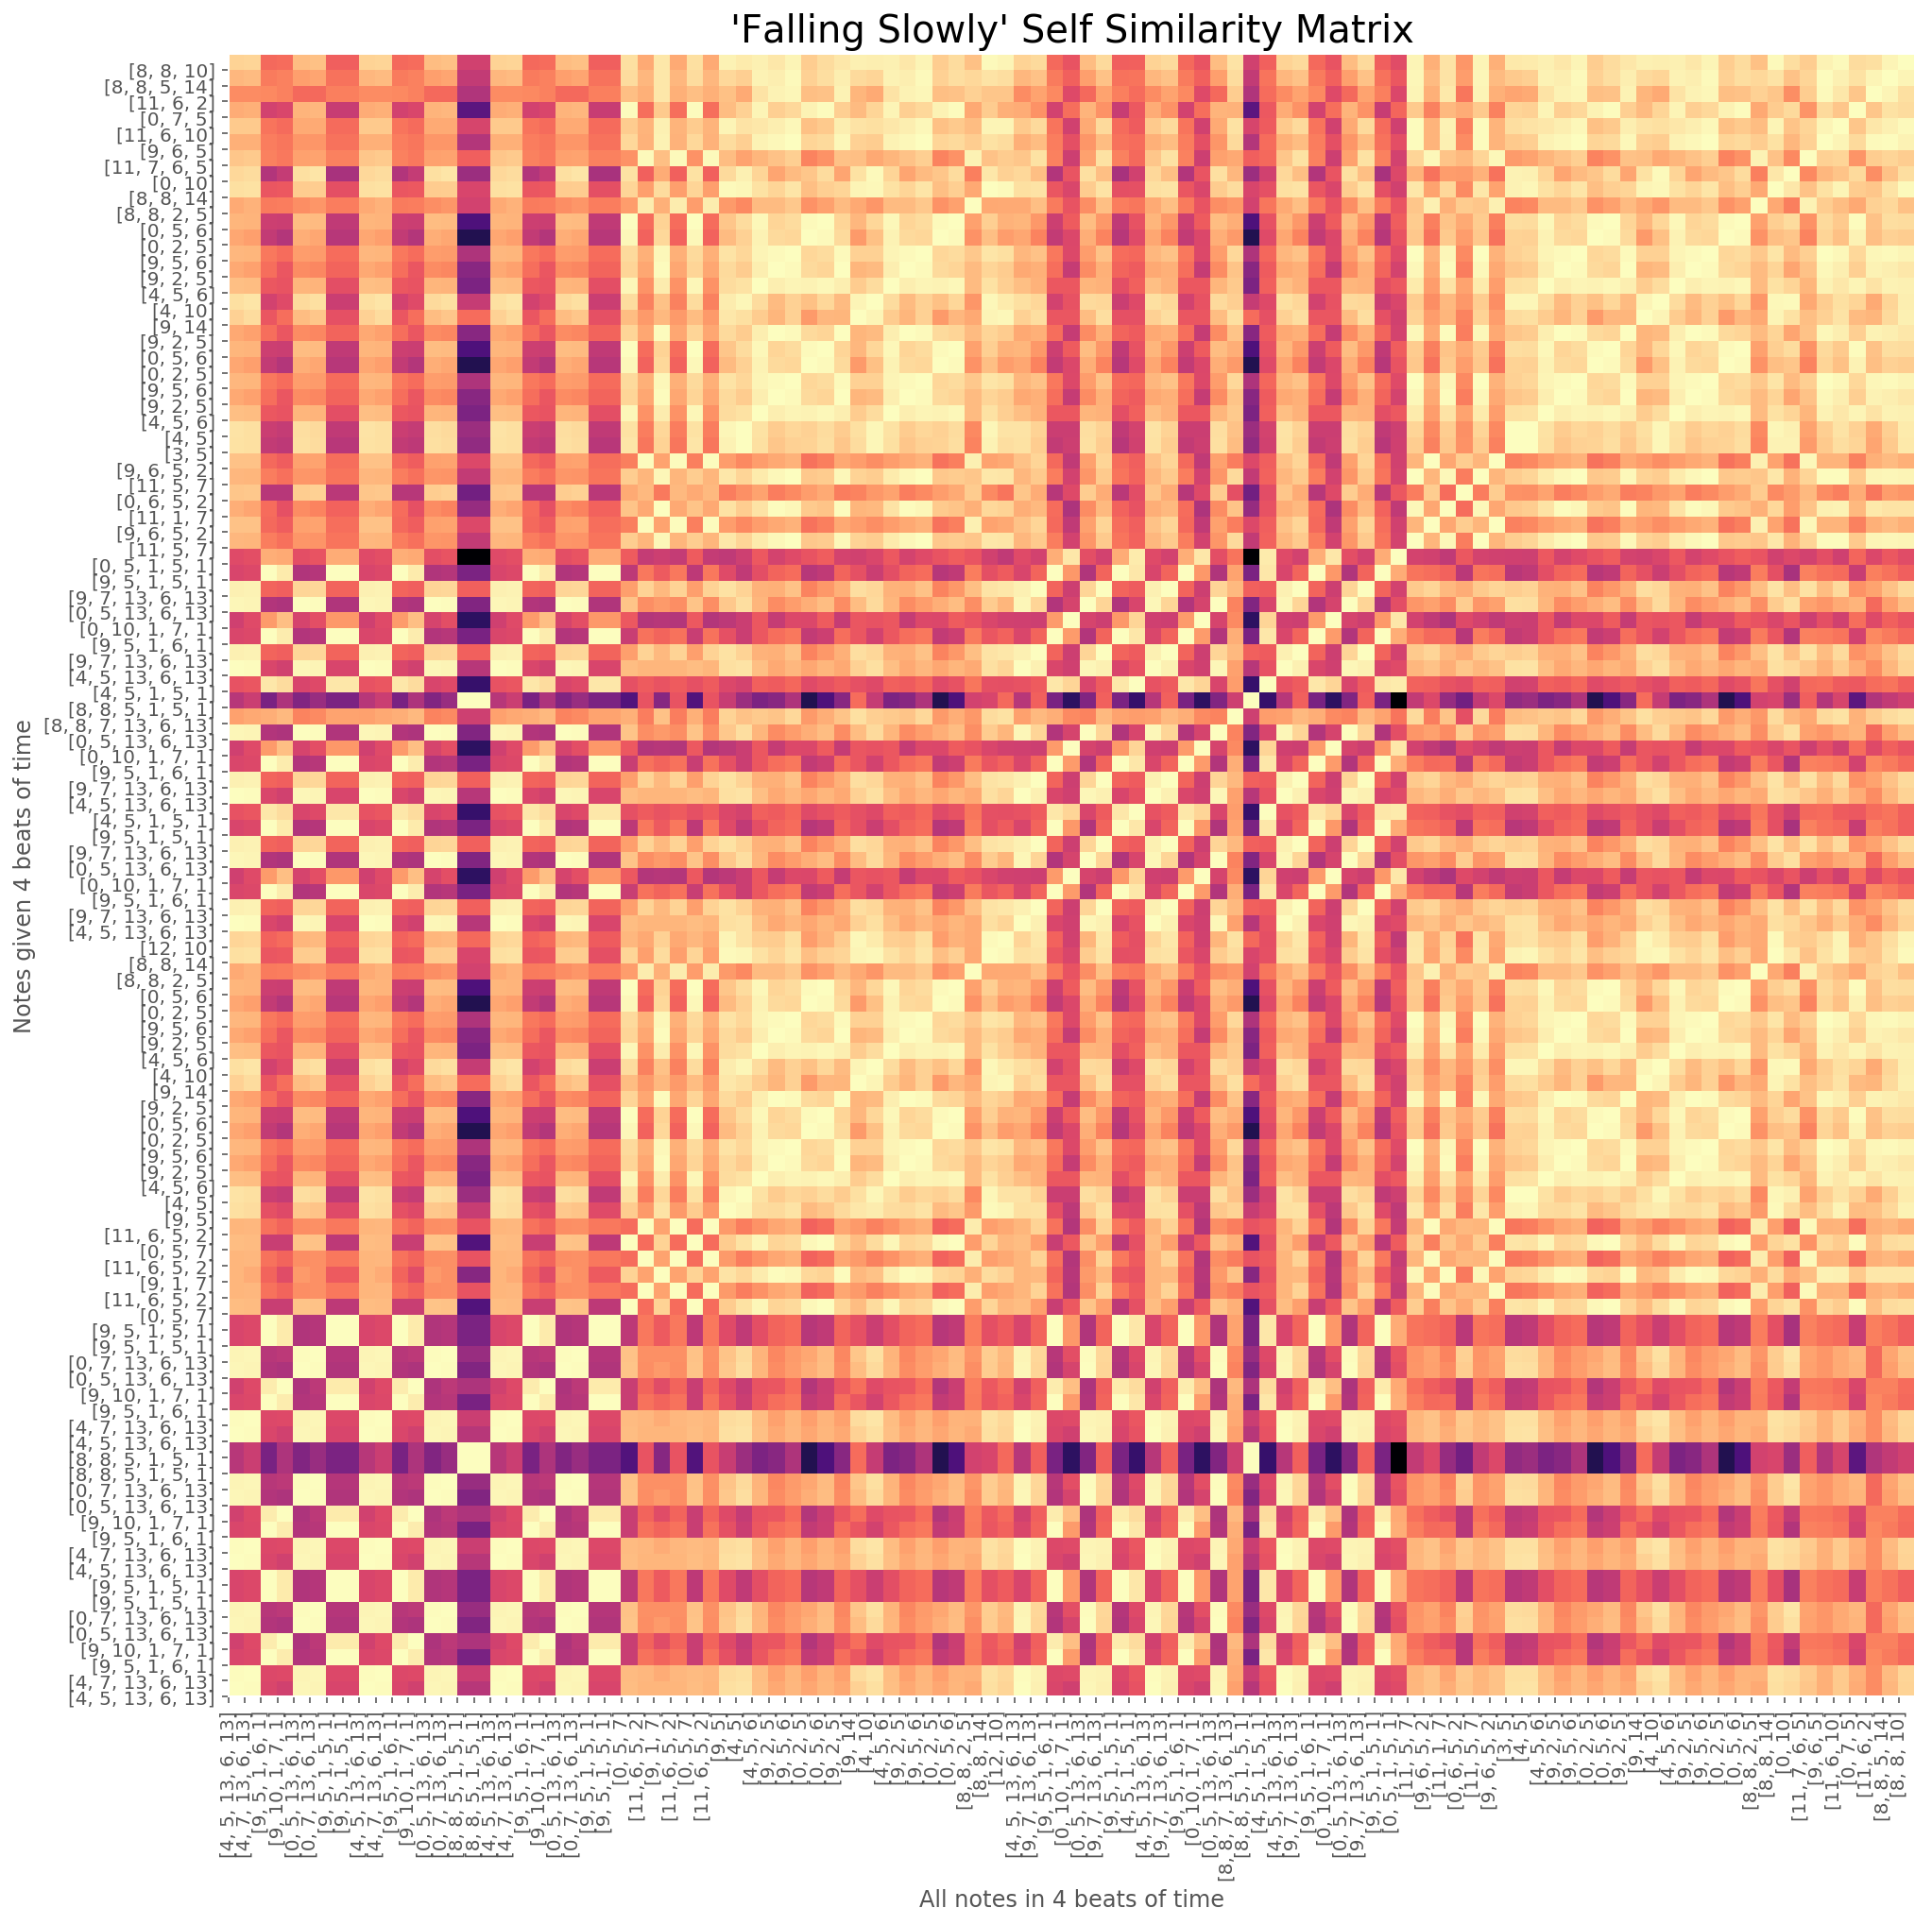

In [21]:
figure(figsize=(16, 16))
specshow(self_similarity_matrix, cmap='magma_r')

xticks(range(len(dic_list)), dic_list, rotation=90);
yticks(range(len(dic_list)), dic_list);
xlabel('All notes in 4 beats of time')
ylabel('Notes given 4 beats of time')

title("'Falling Slowly' Self Similarity Matrix", fontsize= 20);



In [70]:
y, sr = librosa.load('/Users/Haebichan/Desktop/song4.wav')

In [71]:
mfcc = librosa.feature.mfcc(y=y, sr = sr)

In [72]:
R = librosa.segment.recurrence_matrix(mfcc, metric = 'cosine')

In [ ]:
import matplotlib.pyplot as plt
figure(figsize=(8, 8))
specshow(R, x_axis='time', y_axis='time', cmap='magma_r')
title('Music Self Similarity Matrix');

In [40]:
librosa.get_duration(y=y, sr=sr)

36.931337868480725

In [41]:
S = np.abs(librosa.stft(y))

In [42]:
comps, acts = librosa.decompose.decompose(S, n_components = 2, sort = True)

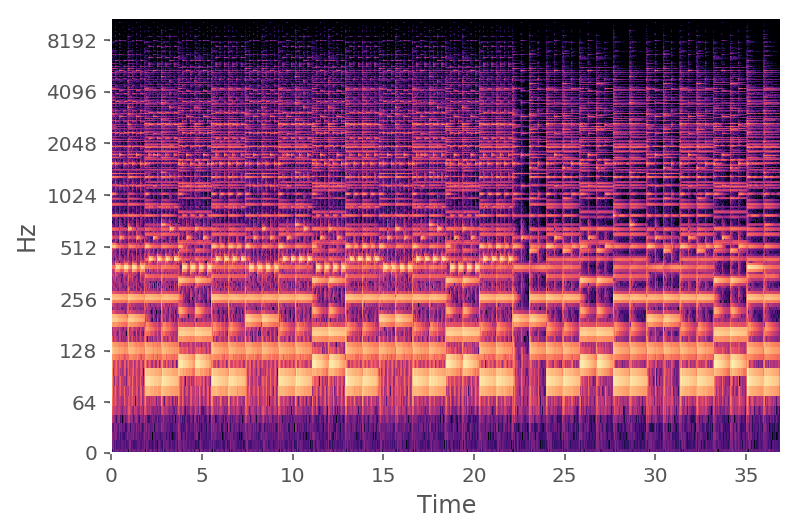

In [43]:
specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time');

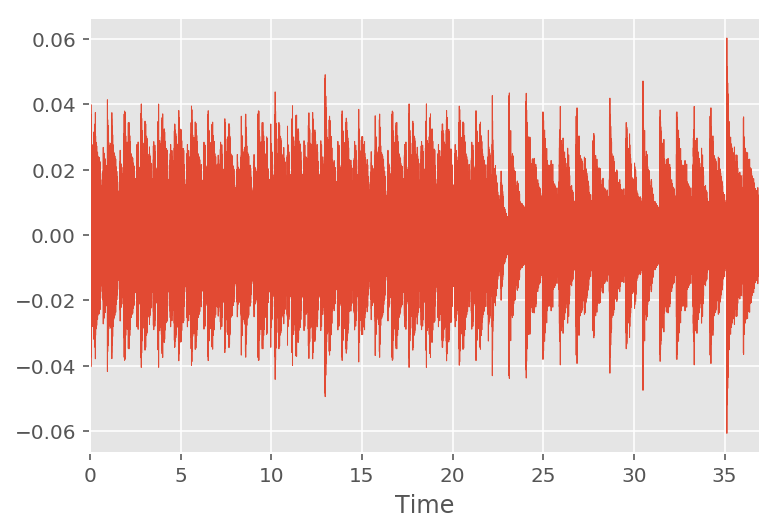

In [44]:
librosa.display.waveplot(y, sr)